<a href="https://colab.research.google.com/github/SentineNet-AI-SpringBoard/SentinelNet-AI/blob/AI-sentineNet-Rohan/SentinelNet_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SentinelNet - AI-Powered Network Intrusion Detection System (NIDS)

## Project Overview: SentinelNet

SentinelNet is like a smart security guard for computer networks. Its main job is to find and stop bad stuff happening on the network, like hacking attempts or viruses trying to get in.

It uses Artificial Intelligence (AI) to do this, specifically two types of AI:

1.  **Supervised Learning**: This is like teaching the AI by showing it examples of what good network traffic looks like and what bad network traffic (like attacks) looks like. The AI learns the patterns to spot the bad stuff on its own later.
2.  **Unsupervised Learning**: This is like letting the AI explore the network traffic on its own to find unusual patterns or things that don't fit in. This helps it find new or unknown types of attacks that it hasn't been specifically taught to look for.

So, SentinelNet uses these AI techniques to act as a Network Intrusion Detection System (NIDS), constantly watching the network to keep it safe by identifying and alerting about malicious activity.

### Step 1: Dataset Acquisition and Loading

The dataset used in this project is CICIDS2017, obtained from the official source of the Canadian Institute for Cybersecurity.
Dataset: https://www.unb.ca/cic/datasets/ids-2017.html

In [ ]:
# ==========================================================
# 1. Dataset exploration
# ==========================================================
import pandas as pd
import numpy as np
file_path = '/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv'
df = pd.read_csv(file_path)
## how many rows and columns are in our data. It's like saying how many entries and how many pieces of information there are for each entry.
print(f"Dataset shape: {df.shape}")
##prints the text "First 5 rows:" to the output.
print("\nFirst 5 rows:")
## (.head())is function  used to on a dataframe it gives few rowss of dataframe.
print(df.head())
## this line used to show what kind of infomation is in each column
## how many entries are complete. It helps you quickly understand the data types and if there are any missing values.
print("\nData Types Check and Basic Info Summary:")
df.info()
## it for columns that cantain number in your data
##  It shows things like the average, how spread out the numbers are, and the smallest and largest values.
print("\nBasic Statistics for Numerical Columns:")
print(df.describe())
## this line can show you that how many missing values are are in each column of in the data.
print("\nCount of Missing Values per Column:")
print(df.isnull().sum())

Dataset shape: (692703, 79)

First 5 rows:
    Destination Port   Flow Duration   Total Fwd Packets  \
0                 80           38308                   1   
1                389             479                  11   
2                 88            1095                  10   
3                389           15206                  17   
4                 88            1092                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            6   
1                        5                          172   
2                        6                         3150   
3                       12                         3452   
4                        6                         3150   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             6                       6   
1                           326                      79   
2                          3150                    1575   
3    

In [8]:
display(df.head())

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# ==========================================================
# 2. Handle Duplicates and Irrelevant Features
# ==========================================================
# Assuming 'df' from previous steps is available and cleaned
# If not, load the original data first as cleaning happens here
file_path = '/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()
initial_rows, initial_cols = df.shape

# Handle Duplicates (Rows)
df.drop_duplicates(inplace=True)

# Handle Irrelevant Features (Columns)
irrelevant_cols = ['Flow ID', 'Timestamp']
df.drop(columns=[col for col in irrelevant_cols if col in df.columns], inplace=True)

final_rows, final_cols = df.shape
print(f"\n--- Data Cleaning Summary ---")
### this helps you that how many rows and columns your data had before cleaning
print(f"Initial Shape: {initial_rows} rows, {initial_cols} columns")
###print(f"Rows removed (Duplicates): {initial_rows - final_rows}")
print(f"Final Shape:   {final_rows} rows, {final_cols} columns")
### This line shows you how many duplicate rows were removed from your data.
print(f"Rows removed (Duplicates): {initial_rows - final_rows}")
###This line shows you how many columns were removed because they were not relevant.
print(f"Columns removed (Irrelevant Features): {initial_cols - final_cols}")


--- Data Cleaning Summary ---
Initial Shape: 692703 rows, 79 columns
Final Shape:   610794 rows, 79 columns
Rows removed (Duplicates): 81909
Columns removed (Irrelevant Features): 0


In [7]:
# ==========================================================
# 3. Save Cleaned Data (Intermediate)
# ==========================================================
# Save the cleaned data to the content directory
df.to_csv('cleaned_data_intermediate.csv', index=False)
print("\nIntermediate cleaned data saved to: cleaned_data_intermediate.csv")


Intermediate cleaned data saved to: cleaned_data_intermediate.csv


In [ ]:
# ==========================================================
# 4. Identify Categorical and Numerical Features
# ==========================================================
try:
    df
except NameError:
    file_path = '/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv'
    df = pd.read_csv(file_path)

### this lines help  which columns have text and which have numbers in your data.
categorical_features = df.select_dtypes(include='object').columns.tolist()
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
### These lines simply show you the lists of columns that were identified as having text (categorical) and those with numbers.
print(f"\nCategorical Features: {categorical_features}")
print(f"Numerical Features: {numerical_features}")


Categorical Features: ['Label']
Numerical Features: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count'


Correlation Matrix (Top 5 features):
                              Destination Port   Flow Duration  \
 Destination Port                     1.000000       -0.196766   
 Flow Duration                       -0.196766        1.000000   
 Total Fwd Packets                   -0.003484        0.014660   
 Total Backward Packets              -0.003255        0.013723   
Total Length of Fwd Packets           0.015119        0.082203   

                              Total Fwd Packets   Total Backward Packets  \
 Destination Port                     -0.003484                -0.003255   
 Flow Duration                         0.014660                 0.013723   
 Total Fwd Packets                     1.000000                 0.998900   
 Total Backward Packets                0.998900                 1.000000   
Total Length of Fwd Packets            0.726200                 0.725553   

                             Total Length of Fwd Packets  \
 Destination Port                               

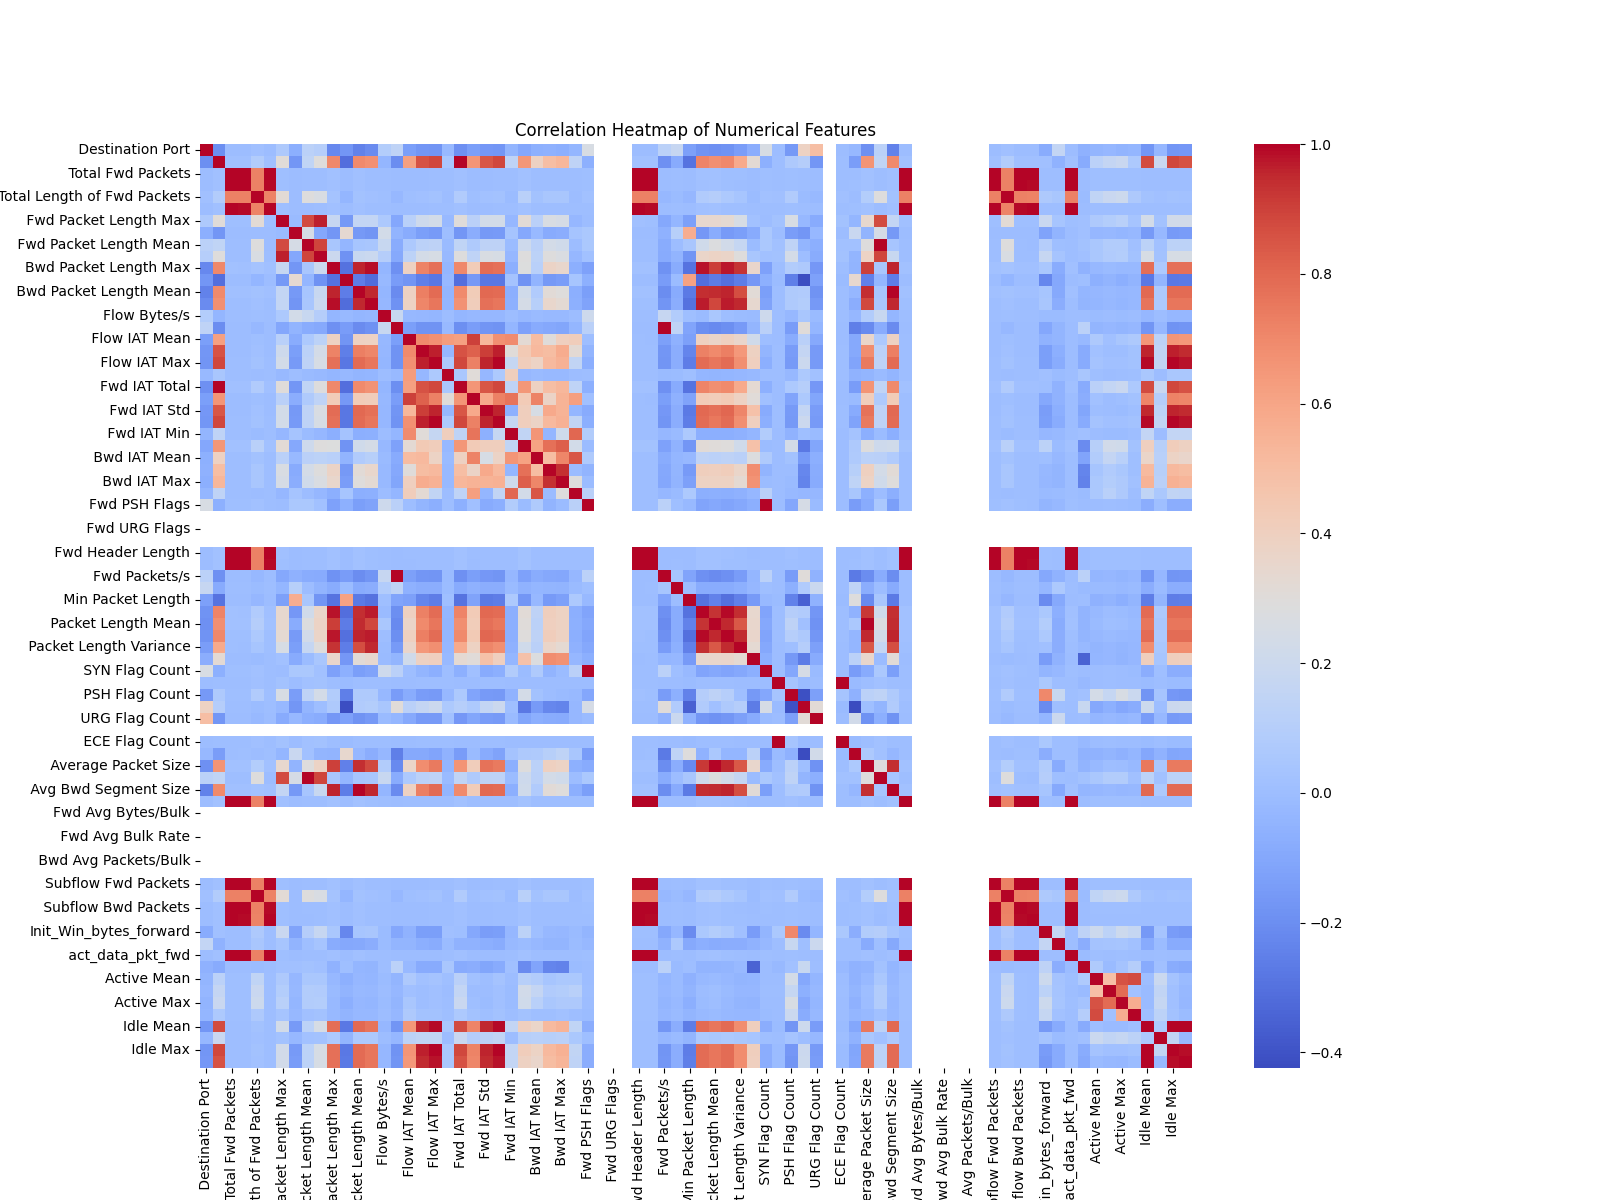

<Figure size 1600x1200 with 0 Axes>

In [ ]:
# ==========================================================
# 5. Check correlation using heatmap
# ==========================================================
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
# Assuming 'df' from previous steps is available and cleaned
# If not, load the original data or cleaned intermediate data
try:
    df
except NameError:
    file_path = '/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv'
    df = pd.read_csv(file_path)

###These lines calculate how much each number column in your data is related to every other number column
correlation_matrix = df[numerical_features].corr()
print("\nCorrelation Matrix (Top 5 features):")
print(correlation_matrix.head())
##This line creates a colored map to show how strongly the number columns are related to each other.
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
## This line adds a title to the correlation heatmap so you know what the plot is showing.
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.clf()
print("\nCorrelation heatmap saved as: correlation_heatmap.png")

# Display the saved correlation heatmap image
display(Image('correlation_heatmap.png'))


Number of outliers in 'Bwd Packet Length Max' (IQR method): 23199

Boxplot saved as: boxplot_outliers.png


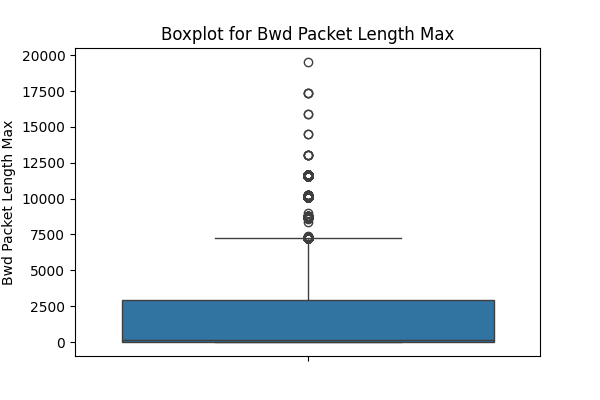

<Figure size 600x400 with 0 Axes>

In [ ]:
# ==========================================================
# 6. Check for outliers with and without boxplot
# ==========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

file_path = '/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv'
df = pd.read_csv(file_path)
### These lines find the values that divide your data into quarters.
outlier_col = 'Bwd Packet Length Max'
if outlier_col in df.columns:
  ### is the value where 25% of the data is below it,
    Q1 = df[outlier_col].quantile(0.25)
    ### is where 75% of the data is below it.
    Q3 = df[outlier_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ###  outliers_iqr = df[(df[outlier_col] < lower_bound) | (df[outlier_col] > upper_bound)]
    outliers_iqr = df[(df[outlier_col] < lower_bound) | (df[outlier_col] > upper_bound)]
    print(f"\nNumber of outliers in '{outlier_col}' (IQR method): {len(outliers_iqr)}")
    ### These lines create a boxplot to visually show the distribution of data and highlight potential outliers, then save the plot as an image file.
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[outlier_col])
    plt.title(f'Boxplot for {outlier_col}')
    plt.savefig('boxplot_outliers.png')
    plt.clf()
    print(f"\nBoxplot saved as: boxplot_outliers.png")

    # Display the saved boxplot image
    display(Image('boxplot_outliers.png'))
else:
    print(f"\nColumn '{outlier_col}' not found for outlier check.")

In [ ]:
# ==========================================================
# 7. Check for important and non important features
# ==========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

file_path = '/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv'
df = pd.read_csv(file_path)
## These lines help you find which columns have numbers and which have text in your data.
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
### This line shows you the numerical columns with the fewest different values, which might be less important.
categorical_features = df.select_dtypes(include=['object', 'category']).columns

print("\nUnique count for numerical features (low count may suggest low importance):")
print(df[numerical_features].nunique().sort_values().head(10))
### If there are any text columns, these lines show you all the unique values in each of those columns and how many times each value appears.
if len(categorical_features) > 0:
    print("\nValue counts for categorical features:")
    for col in categorical_features:
        print(f"{col}:\n{df[col].value_counts()}\n")


Unique count for numerical features (low count may suggest low importance):
 Bwd PSH Flags           1
 Fwd Avg Bulk Rate       1
Bwd Avg Bulk Rate        1
 Bwd Avg Packets/Bulk    1
 Bwd Avg Bytes/Bulk      1
Fwd Avg Bytes/Bulk       1
 Bwd URG Flags           1
 Fwd Avg Packets/Bulk    1
 CWE Flag Count          1
 Fwd URG Flags           1
dtype: int64

Value counts for categorical features:
 Label:
 Label
BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: count, dtype: int64



In [ ]:
# ==========================================================
# 8. Apply encoding on categorical features (Label)
# ==========================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'df' from previous steps is available and cleaned
# If not, load the original data or cleaned intermediate data
try:
    df
except NameError:
    file_path = '/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv'
    df = pd.read_csv(file_path)

categorical_features = df.select_dtypes(include='object').columns.tolist()

### This part sets up a tool to change the 'Label' column into numbers using One-Hot Encoding.
if 'Label' in categorical_features:
    ct = ColumnTransformer(
        ### These lines take your data and apply the encoding, turning the 'Label'
        ##text into numbers, and create a new data table with the transformed data and correct column names.
        transformers=[
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Label'])
        ],
        remainder='passthrough'
    )
    encoded_array = ct.fit_transform(df)
    feature_names = ct.get_feature_names_out()
    df_encoded = pd.DataFrame(encoded_array, columns=feature_names)
      ### : This cleans up the names of the new columns created by one-hot encoding.
    df_encoded.columns = df_encoded.columns.str.split('__').str[-1]
    ###  This removes any extra columns created during the encoding process that are not needed.
    df_encoded.drop(columns=df_encoded.filter(regex='remainder').columns, inplace=True)
else:
  ##  This handles the case where there are no categorical features to encode, simply creating a copy of the original DataFrame.
    df_encoded = df.copy()
 ## These lines print the first few rows of the new DataFrame with the encoded features to show the result.
print("\nEncoded DataFrame Head:")
print(df_encoded.head())


Encoded DataFrame Head:
    Destination Port   Flow Duration   Total Fwd Packets  \
0                 80           38308                   1   
1                389             479                  11   
2                 88            1095                  10   
3                389           15206                  17   
4                 88            1092                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            6   
1                        5                          172   
2                        6                         3150   
3                       12                         3452   
4                        6                         3150   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             6                       6   
1                           326                      79   
2                          3150                    1575   
3                      

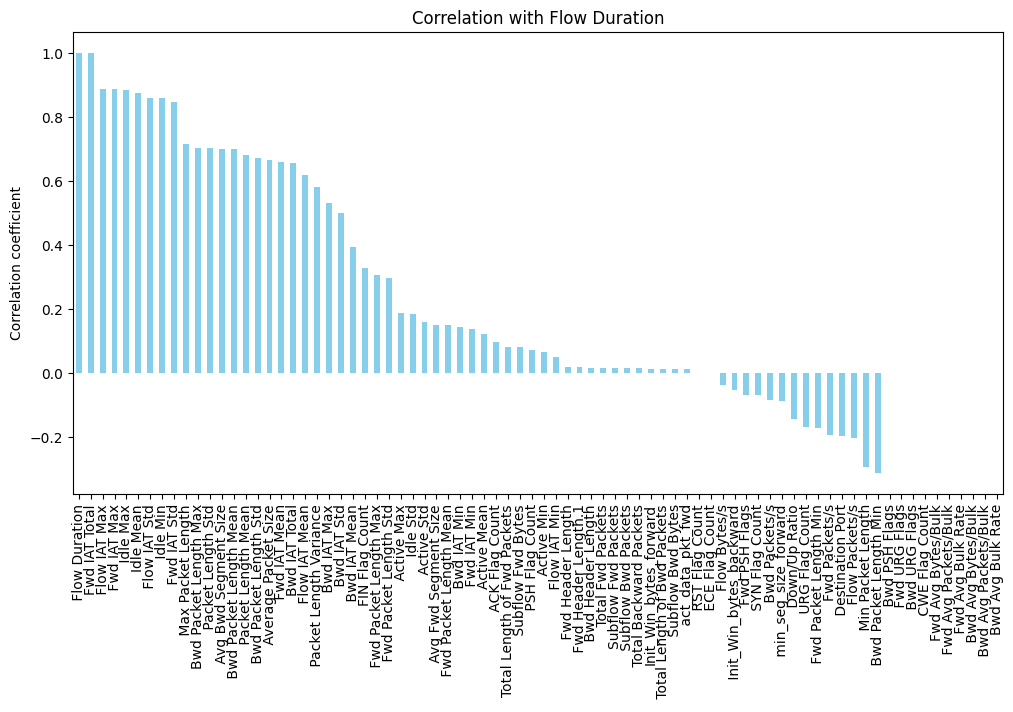

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the original data
file_path = '/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv'
df = pd.read_csv(file_path)

# Plotting the correlation using bargraph
numeric_df = df.select_dtypes(include=['int64', 'float64'])
target_corr = numeric_df.corr()[' Flow Duration'].sort_values(ascending=False)

plt.figure(figsize=(12,6))
target_corr.plot(kind='bar', color='skyblue')
plt.title("Correlation with Flow Duration")
plt.ylabel("Correlation coefficient")
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Load the original data - assuming the path is correct
file_path = '/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv'
df = pd.read_csv(file_path)

# Separating dataset columns into categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64','float64']).columns

print("Categorical:", categorical_features)
print("Numerical:", numerical_features)

Categorical: Index([' Label'], dtype='object')
Numerical: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',

Correlation with target:
 Label        1.000000
Feature_A    0.079843
Feature_C    0.032340
Feature_B   -0.132126
Name: Label, dtype: float64


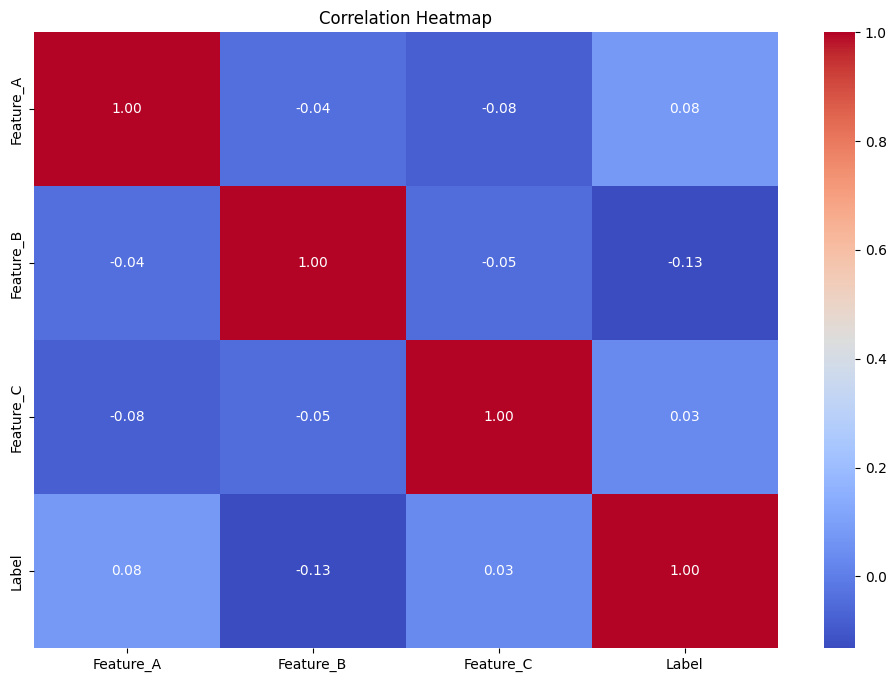

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame({
    'Feature_A': np.random.rand(100),
    'Feature_B': np.random.rand(100) * 5,
    'Feature_C': np.random.randn(100) + 10,
    'Label': np.random.rand(100) * 2 + 0.5
})
corr_matrix = df.corr()
target_corr = corr_matrix['Label'].sort_values(ascending=False)
print("Correlation with target:\n", target_corr)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Evaluating RandomForestClassifier model...
Evaluation completed in 0.56 seconds.

--- Model Evaluation Metrics ---
Accuracy: 0.9984

Classification Report:
                  precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00     88006
   DoS GoldenEye       1.00      0.99      0.99      2059
        DoS Hulk       1.00      1.00      1.00     46215
DoS Slowhttptest       1.00      0.98      0.99      1100
   DoS slowloris       1.00      0.99      1.00      1159
      Heartbleed       1.00      1.00      1.00         2

        accuracy                           1.00    138541
       macro avg       1.00      0.99      1.00    138541
    weighted avg       1.00      1.00      1.00    138541


Confusion Matrix:


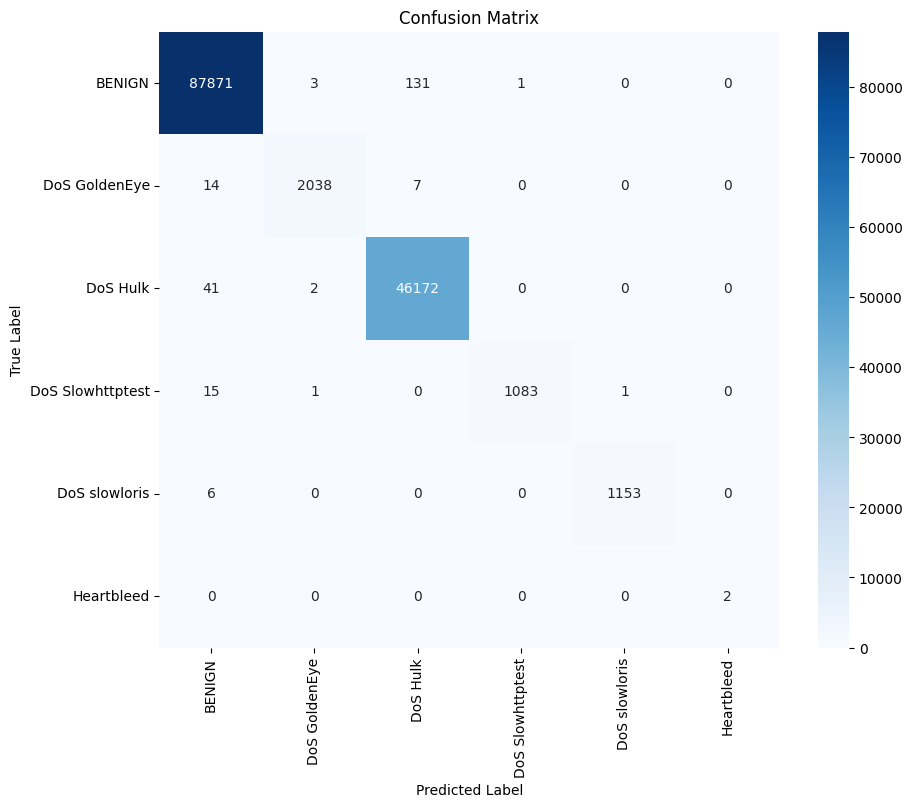

In [ ]:
# ==========================================================
# 9. Evaluate the Machine Learning Model
# ==========================================================
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Assuming model, X_test, and y_test are available from previous steps
try:
    model
    X_test
    y_test
except NameError:
    print("Model or test data (X_test, y_test) not found. Please run the training and data splitting steps first.")
    exit()

print("Evaluating RandomForestClassifier model...")
start_time = time.time()

# Make predictions on the test set
y_pred = model.predict(X_test)

end_time = time.time()
evaluation_time = end_time - start_time

print(f"Evaluation completed in {evaluation_time:.2f} seconds.")

# Display evaluation metrics
print("\n--- Model Evaluation Metrics ---")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (includes Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# ==========================================================
# 10. Save the dataset - encoded version
# ==========================================================
import os
import pandas as pd
try:
    df_encoded
except NameError:
    print("df_encoded not found. Please run the encoding step first.")
OUTPUT_DIR = './output_plots'
os.makedirs(OUTPUT_DIR, exist_ok=True)
df_encoded.to_csv(os.path.join(OUTPUT_DIR, 'final_encoded_dataset.csv'), index=False)
print(f"\nFinal encoded dataset saved to: {os.path.join(OUTPUT_DIR, 'final_encoded_dataset.csv')}")


Final encoded dataset saved to: ./output_plots/final_encoded_dataset.csv
